# Image Processing using Python
Welcome to the tutorial of Image Processing with Python and SciPy. This tutorial will walk you through how to process an image from loading an image to adding image effects to your picture. 

**You will learn to:**
- Load a full-color image to a NumPy array
- Display the image in your Jupyter Notebook
- Crop the image to a square shape
- Create a thumbnail of the image
- Apply a color effect using built-in colormap
- Flip an image
- Save your output image to an image file


## 1. Load the packages needed for this exercise
- [numpy](https://numpy.org/) one of the core packages in the scipy ecosystem, powerful N-dimensional array package
- [scipy](https://www.scipy.org/) a Python-based ecosystem of open-source software for mathematics, science, and engineering 
- [matplotlib](https://matplotlib.org/) another core package in scipy ecosystem, a comprehensive library for creating static, animated, and interactive visualizations in Python
- [PIL](https://python-pillow.org/) a Python-based image library

In [1]:
import numpy as np
import scipy
import matplotlib as mpl
import matplotlib.pyplot as plt
from PIL import Image, ImageEnhance

## 2. Load images to Jupyter Notebook
Here we are going to read a picture of cat sloan using python. The picture is saved in the 'images' folder. We are using the 'Image' package of Pillow to load the picutre and convert it to a NumPy array.

In [2]:
# Put your image path here
fname = "images/" + "cat_sloan.jpg"

# Load the image as NumPy array
my_image = Image.open(fname)
image = np.array(my_image)
print(type(image))

<class 'numpy.ndarray'>


## 3. Display the image with a caption
We are going to use matplotlib.pyplot to plot the image with a caption. The caption is placed under the image in the center. 

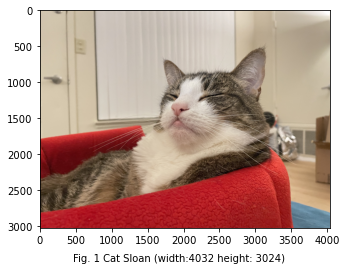

In [3]:
# Display my image and its resolution
width, height = my_image.size
caption = "Fig. 1 Cat Sloan (width:" + str(width) + " height: " + str(height) + ")"
plt.imshow(image)
plt.figtext(0.5, 0.01, caption, wrap=True, horizontalalignment='center')
plt.show()

## 4. Crop the image to a square shape
Assume we are going to keep the center part of the picture and crop it as a square. As we already know the width and height of the image, we are going to choose a proper side length smaller than both of them. Here we use 2500. 

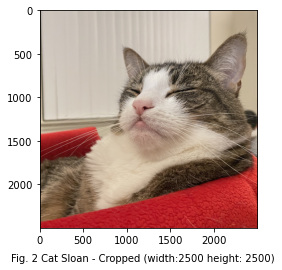

In [4]:
# Crop the image to (2500, 2500, 3)
left = (width - 2500)/2
right = (width + 2500)/2
top = (height - 2500)/2
bottom = (height + 2500)/2
image_crop = my_image.crop((left, top, right, bottom))

new_width, new_height = image_crop.size
caption2 = "Fig. 2 Cat Sloan - Cropped (width:" + str(new_width) + " height: " + str(new_height) + ")"
plt.imshow(image_crop)
plt.figtext(0.5, 0.01, caption2, wrap=True, horizontalalignment='center')
plt.show()

## 5. Create a thumbnail of the image
As the thumbnail function will edit the image in-place, we are going to create a copy of the original file and edit on the copy. In this way, it won't effect the resolution of the original image object. And then we save the thumbnail to the 'images' folder. 

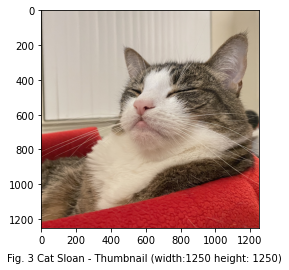

In [5]:
# Create a thumbnail for the image
image_thm = image_crop.copy()
image_thm.thumbnail((new_width/2, new_width/2))
image_thm.save("images/"+"sloan_thumbnail.jpg")

width_thm, height_thm = image_thm.size
caption3 = "Fig. 3 Cat Sloan - Thumbnail (width:" + str(width_thm) + " height: " + str(height_thm) +")"
plt.imshow(image_thm)
plt.figtext(0.5, 0.01, caption3, wrap=True, horizontalalignment='center')
plt.show()

## 6. Add a color effect to the picture
We are going to use matplotlib default color ramps to add an color effect to the image. Here we choose the 'twilight' colormap which will give the image an effect of fake negative film.

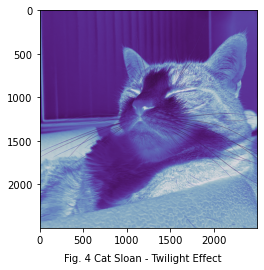

In [6]:
# Add a color effect to sloan
# Select a color map 
colormap = mpl.cm.get_cmap('twilight')
# Convert to grayscale
image_g = image_crop.convert('L')
# Convert to numpy array
image_c = np.array(image_g)
# Apply color map
image_c = colormap(image_c)

# convert to image object
image_c = np.uint8(image_c * 255)
image_color = Image.fromarray(image_c)

caption4 = "Fig. 4 Cat Sloan - Twilight Effect"
plt.imshow(image_color)
plt.figtext(0.5, 0.01, caption4, wrap=True, horizontalalignment='center')
plt.show()

## 7. Flip the image (left-right)
This trick can be used when there're not enough sample photos for model training. We are going to apply the transpose function to the image_color image object. 

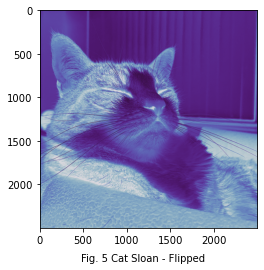

In [7]:
# Flip the image of sloan
image_flip = image_color.transpose(Image.FLIP_LEFT_RIGHT)

caption5 = "Fig. 5 Cat Sloan - Flipped"
plt.imshow(image_flip)
plt.figtext(0.5, 0.01, caption5, wrap=True, horizontalalignment='center')
plt.show()

## 8. Increase the brightness of the image
The image looks a little bit dark right now. To increase the brightness of the current image, we can use the ImageEnhance function and call the Brightness method. In this case, the brightness factor is set as 1.5. You can play with the factor to see how the photo looks like after adjusting the brightness. 

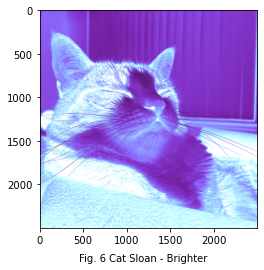

In [8]:
# Increase the Brightness of the image
image_bright = ImageEnhance.Brightness(image_flip).enhance(1.5)

caption6 = "Fig. 6 Cat Sloan - Brighter"
plt.imshow(image_bright)
plt.figtext(0.5, 0.01, caption6, wrap=True, horizontalalignment='center')
plt.show()

## 9. Save your work
We want to keep the file type consistent with the original files as jpg. The current image object has Red, Green, Blue  valuse and an Alpha value which represents the transparency of the image. But a jpg file doesn't have transparency. So before we save the image, we need to convert the image object to RGB format.

In [9]:
image_output = image_bright.convert('RGB')
image_output.save("images/"+"sloan_bright.jpg")